# Power Spectrum Computation

## Introduction

The main entry point to the power spectrum module is the `calc_power()` function, which takes a set of points, deposits them onto a mesh (optionally with interlacing), computes the mode powers through an FFT, and then computes bandpowers and multipoles. This notebook is a quick demonstration of that function, with a similarly quick sanity check against nbodykit.

## Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from abacusnbody.analysis.power_spectrum import calc_power

Load the data:

In [2]:
power_test_data = dict(**np.load("../../../tests/data_power/test_pos.npz"))
Lbox = 1000.
pos = power_test_data['pos']

Specifications of the power spectrum computation. The only required args are `pos` and `Lbox`.

In [3]:
interlaced = True
compensated = True
paste = 'TSC'
nmesh = 72
nbins_mu = 4
logk = False
k_hMpc_max = np.pi*nmesh/Lbox + 1.e-6
nbins_k = nmesh//2
poles = [0, 2, 4]

Compute the power spectrum, including bandpowers and multipoles:

In [4]:
power = calc_power(pos, Lbox, nbins_k, nbins_mu, k_hMpc_max, logk, \
                    paste, nmesh, compensated, interlaced, poles=poles)

The result is an Astropy Table. The shape of the `k_avg`, `power`, etc, columns is `(nbins_k,nbins_mu)`. The `poles` column is shape `(nbins_k,len(poles))`.

In [5]:
power

k_min,k_max,k_mid,k_avg,power,N_mode,poles,N_mode_poles,mu_min,mu_max,mu_mid
float64,float64,float64,float32[4],float32[4],int64[4],float32[3],int64,float64[4],float64[4],float64[4]
0.0,0.006283213084957364,0.003141606542478682,0.005026548 .. 0.0062831854,7568.9023 .. 6049.0254,5 .. 2,7134.6523 .. 33801.098,7,0.0 .. 0.75,0.25 .. 1.0,0.125 .. 0.875
0.006283213084957364,0.012566426169914728,0.009424819627436047,0.010726068 .. 0.012566371,2942.2803 .. 49420.074,8 .. 2,12721.525 .. 8581.41,26,0.0 .. 0.75,0.25 .. 1.0,0.125 .. 0.875
0.012566426169914728,0.018849639254872094,0.015708032712393412,0.016180087 .. 0.01517894,9128.091 .. 26119.805,16 .. 18,17876.928 .. -4302.0957,90,0.0 .. 0.75,0.25 .. 1.0,0.125 .. 0.875
0.018849639254872094,0.025132852339829457,0.021991245797350775,0.022035956 .. 0.022221854,9138.691 .. 20882.14,20 .. 42,16421.23 .. -2728.3147,134,0.0 .. 0.75,0.25 .. 1.0,0.125 .. 0.875
0.025132852339829457,0.031416065424786824,0.02827445888230814,0.0278653 .. 0.02873107,9497.041 .. 21889.508,80 .. 58,14460.294 .. 1471.5734,258,0.0 .. 0.75,0.25 .. 1.0,0.125 .. 0.875
0.031416065424786824,0.03769927850974419,0.0345576719672655,0.03427213 .. 0.0344824,8653.626 .. 17725.803,112 .. 90,13018.891 .. -5607.4976,410,0.0 .. 0.75,0.25 .. 1.0,0.125 .. 0.875
0.03769927850974419,0.04398249159470155,0.04084088505222287,0.04038116 .. 0.04089897,8631.141 .. 15932.965,108 .. 138,11582.084 .. 430.21402,494,0.0 .. 0.75,0.25 .. 1.0,0.125 .. 0.875
0.04398249159470155,0.050265704679658914,0.04712409813718023,0.046560723 .. 0.04736551,8191.2383 .. 14180.858,144 .. 178,10757.994 .. -2565.6487,690,0.0 .. 0.75,0.25 .. 1.0,0.125 .. 0.875
0.050265704679658914,0.05654891776461628,0.0534073112221376,0.053127706 .. 0.053584747,8125.8447 .. 13207.899,280 .. 226,9751.573 .. -19.154434,962,0.0 .. 0.75,0.25 .. 1.0,0.125 .. 0.875


The `meta` field saves some information about how the power spectrum was calculated:

In [6]:
power.meta

{'Lbox': 1000.0,
 'logk': False,
 'paste': 'TSC',
 'nmesh': 72,
 'compensated': True,
 'interlaced': True,
 'poles': [0, 2, 4],
 'nthread': 24,
 'N_pos': 421791,
 'is_weighted': False,
 'field_dtype': numpy.float32,
 'squeeze_mu_axis': True}

## Compare with nbodykit

Load presaved nbodykit computation:

In [7]:
comp_str = "_compensated" if compensated else ""
int_str = "_interlaced" if interlaced else ""
fn = f"../../../tests/data_power/nbody_{paste}{comp_str}{int_str}.npz"
data = np.load(fn)
k_nbody = data['k']
Pkmu_nbody = data['power'].real
Pell_nbody = data['power_ell'].real

Plot and compare:

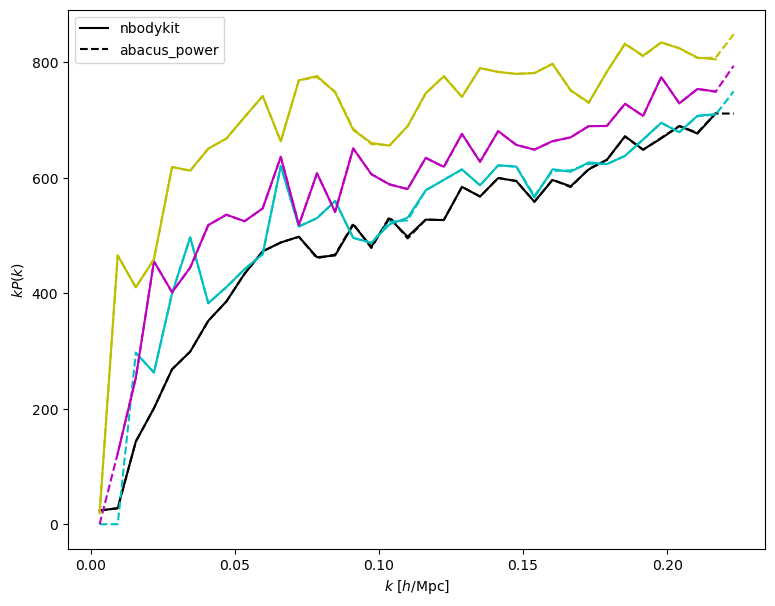

In [8]:
colors = ['k', 'c', 'm', 'y']
plt.figure(figsize=(9, 7))
for i in range(nbins_mu):
    if i == 0:
        label1 = 'nbodykit'
        label2 = 'abacus_power'
    else:
        label1 = label2 = None
    plt.plot(k_nbody, Pkmu_nbody[:, i] * k_nbody, c=colors[i], label=label1)
    plt.plot(power['k_mid'], power['power'][:, i] * power['k_mid'], c=colors[i], ls='--', label=label2)
plt.ylabel(r"$k P(k)$")
plt.xlabel(r"$k \ [h/{\rm Mpc}]$")
plt.legend();

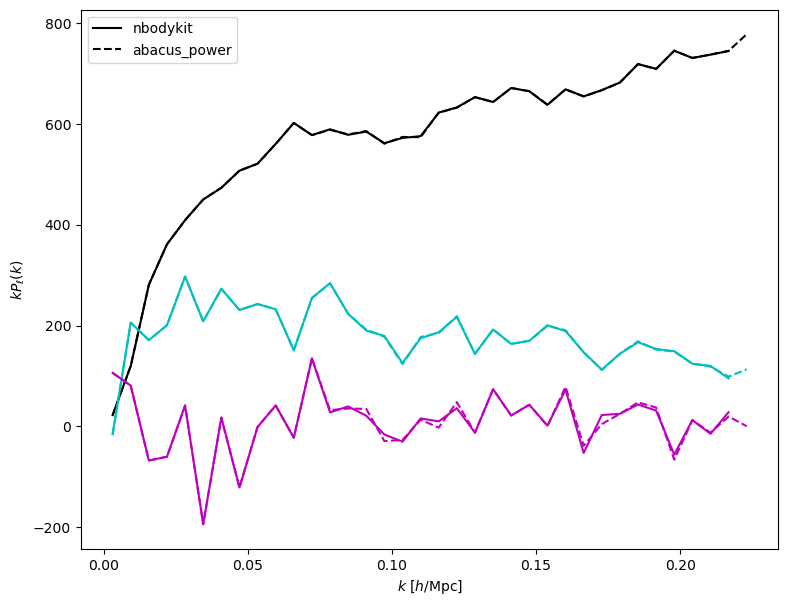

In [9]:
# plot and compare
plt.figure(figsize=(9, 7))
for i in range(len(poles)):
    if i == 0:
        label1 = 'nbodykit'
        label2 = 'abacus_power'
    else:
        label1 = label2 = None
    plt.plot(k_nbody, Pell_nbody[i, :] * k_nbody, c=colors[i], label=label1)
    plt.plot(power['k_mid'], power['poles'][:,i] * power['k_mid'], c=colors[i], ls='--', label=label2)
plt.ylabel(r"$k P_\ell(k)$")
plt.xlabel(r"$k \ [h/{\rm Mpc}]$")
plt.legend();